In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_train = pd.read_csv("/Users/adlnzmnzr/Downloads/titanic/train.csv")
df_test = pd.read_csv("/Users/adlnzmnzr/Downloads/titanic/test.csv")

In [3]:
df_titanic = pd.concat([df_train, df_test], ignore_index = True)

In [4]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [5]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [6]:
df_titanic["Age"] = df_titanic["Age"].fillna(df_titanic["Age"].mean())

In [7]:
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,29.881138,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,29.881138,0,0,359309,8.0500,NaN,S


In [8]:
df_titanic["Age"] = df_titanic["Age"].astype(int)

In [9]:
mapping = {
    1: "First",
    2: "Second",
    3: "Third",
    np.nan: "NA"
}

df_titanic["Pclass"] = df_titanic["Pclass"].map(mapping)

In [10]:
df_titanic["Fare"] = df_titanic["Fare"].astype(float)

In [11]:
df_titanic["Survived"] = df_titanic["Survived"].fillna(df_titanic["Survived"].mean())
df_titanic["Survived"] = df_titanic["Survived"].astype(int)

In [75]:
numeric_cols = df_titanic.select_dtypes(include = ['float64', 'int64']).columns.tolist()
categorical_cols = df_titanic.select_dtypes(include = ['object']).columns.tolist()

In [13]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,Third,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,First,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,Third,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,First,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,Third,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


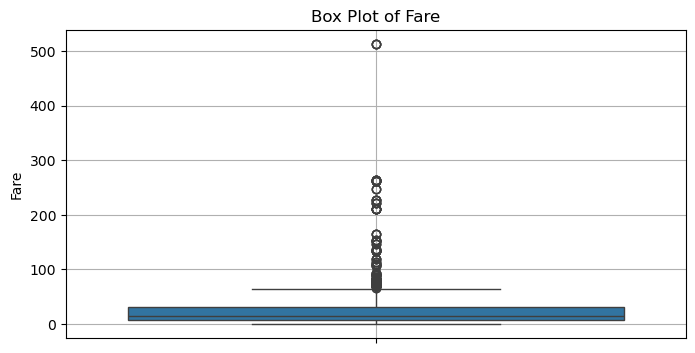

In [73]:
plt.figure(figsize = (8, 4))
sns.boxplot(y = df_titanic['Fare'])
plt.title('Box Plot of Fare')
plt.ylabel('Fare')
plt.grid(True)
plt.show()


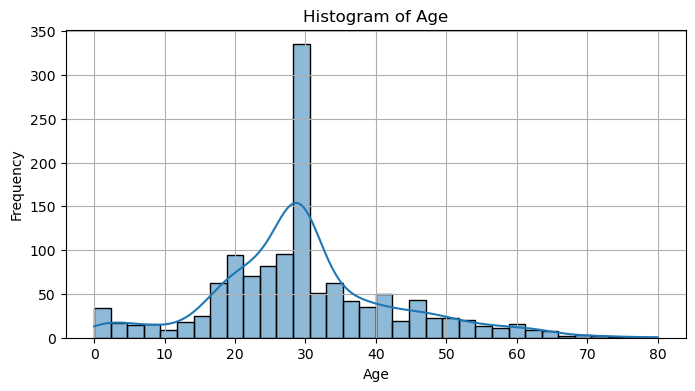

In [71]:
plt.figure(figsize = (8, 4))
sns.histplot(data = df_titanic, x = 'Age', kde = True)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


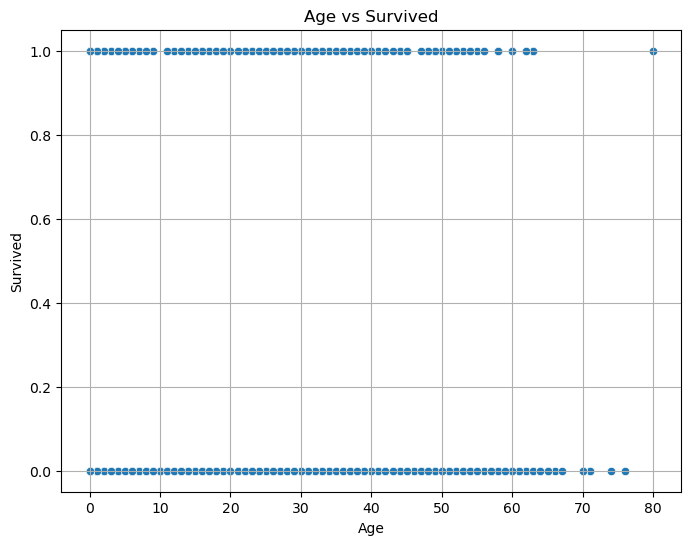

In [69]:
plt.figure(figsize = (8, 6))
sns.scatterplot(data = df_titanic, x = 'Age', y = 'Survived')
plt.title('Age vs Survived')
plt.xlabel('Age')
plt.ylabel('Survived')
plt.grid(True)
plt.show()

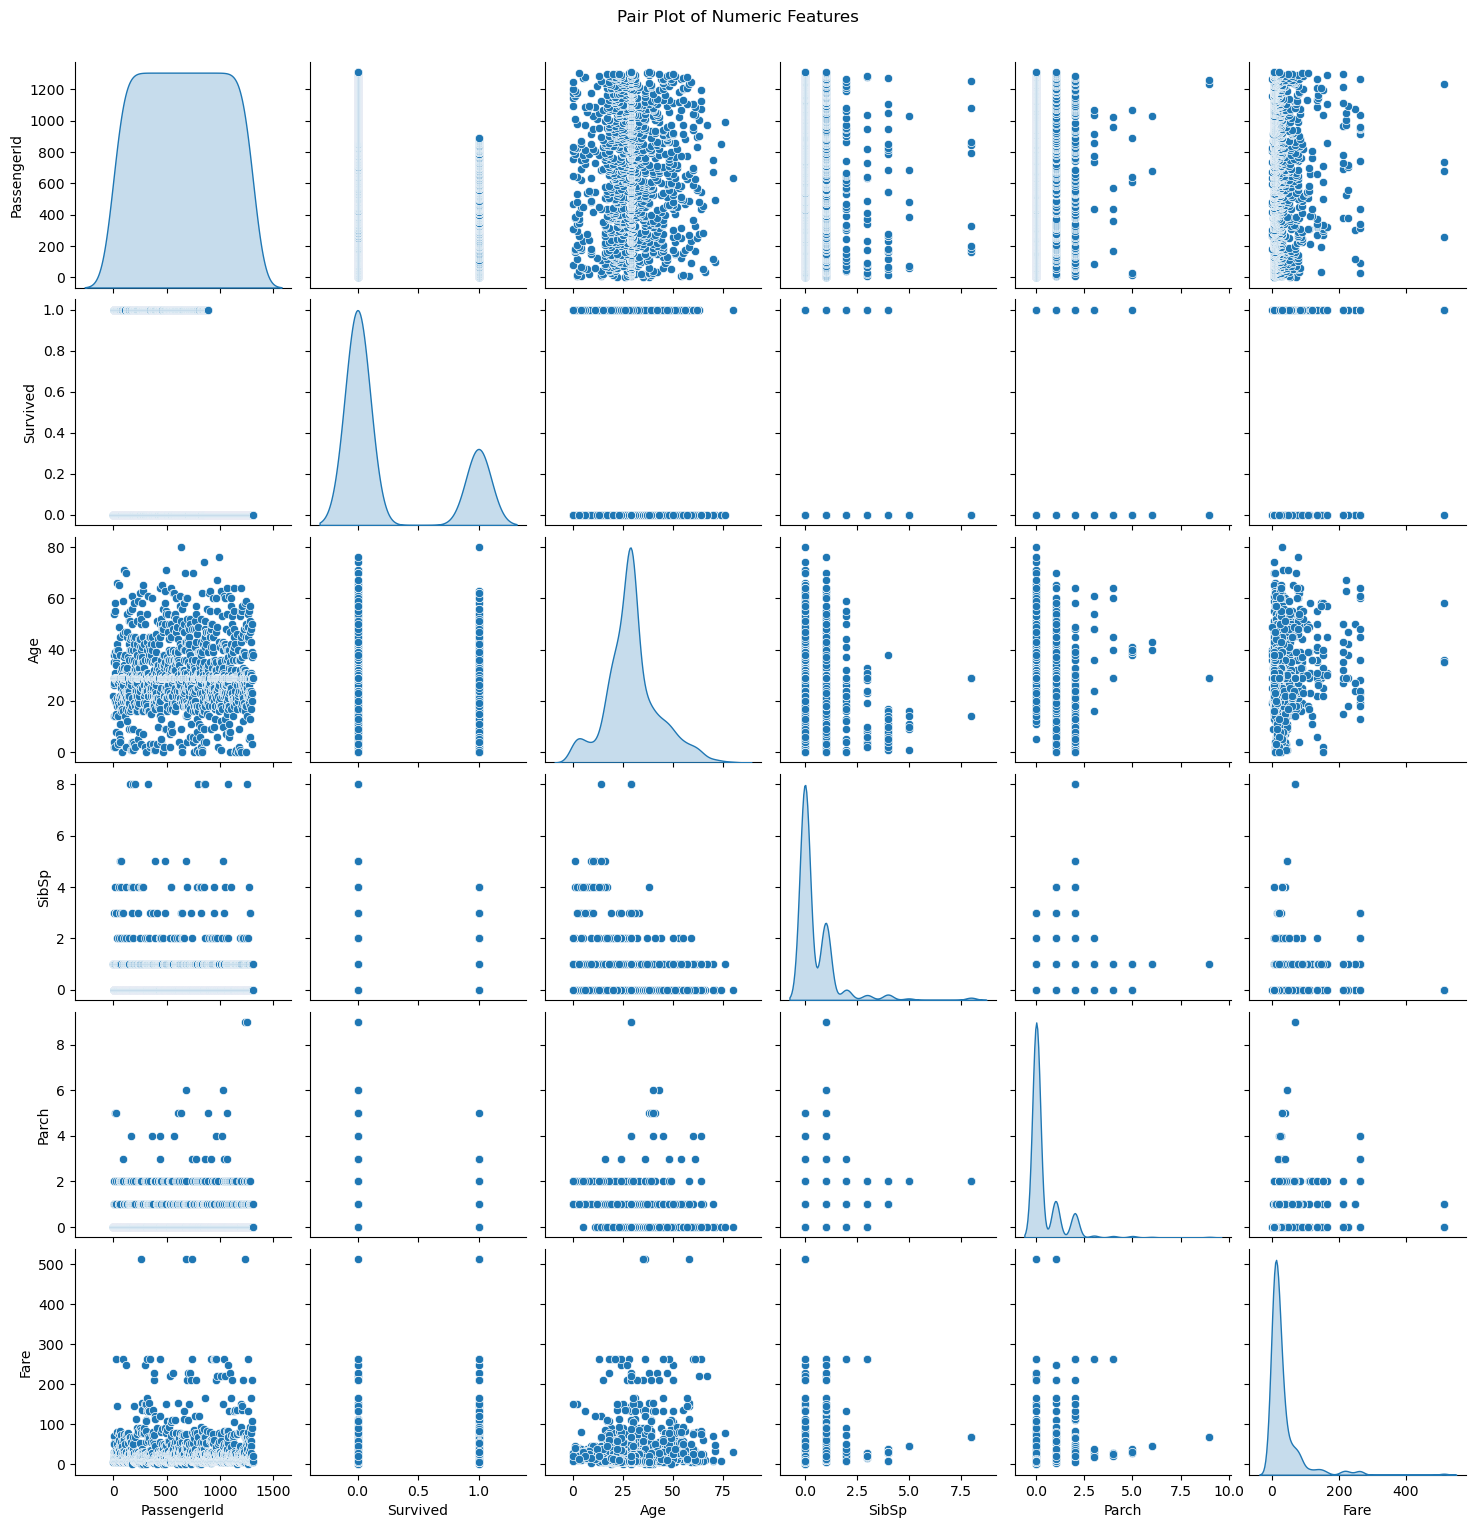

In [55]:
sns.pairplot(df_titanic, diag_kind='kde')
plt.suptitle("Pair Plot of Numeric Features", y=1.02)
plt.show()

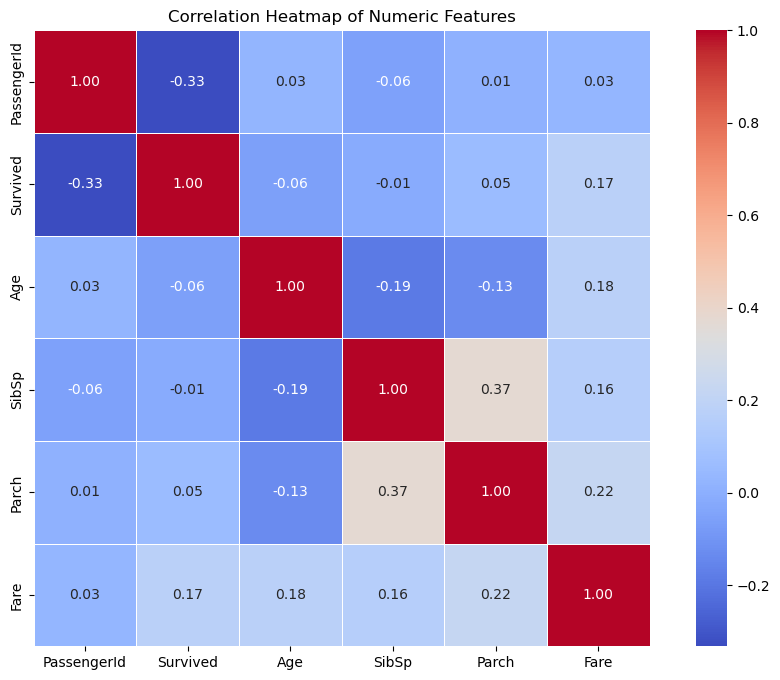

In [67]:
correlation_matrix = df_titanic[numeric_cols].corr()

# Set up the matplotlib figure
plt.figure(figsize = (12, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix, 
            annot = True,    # show correlation values inside the squares
            fmt = ".2f",     # format numbers to 2 decimal places
            cmap = "coolwarm", # color map: blue to red
            square = True,   # make squares
            linewidths = 0.5 # line width between squares
           )

plt.title("Correlation Heatmap of Numeric Features")
plt.show()
